In [ ]:
from google.colab import files

In [ ]:
import pandas as pd

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"evelynzhang05","key":"d1d006add3b4d83f9fcdc7d3c471204e"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c widsdatathon2025

In [ ]:

import zipfile
zip_ref = zipfile.ZipFile('widsdatathon2025.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
df_quantitative = pd.read_excel("/content/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx")
df_categorical = pd.read_excel("/content/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx")
df_labels = pd.read_excel(r"/content/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx", sheet_name="training_combined")

In [ ]:
# Basic info and shape
quantitative_info = df_quantitative.info()
categorical_info = df_categorical.info()
labels_info = df_labels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1200 non-null   float64
 2   ColorVision_CV_Score        1190 non-null   float64
 3   APQ_P_APQ_P_CP              1201 non-null   float64
 4   APQ_P_APQ_P_ID              1201 non-null   float64
 5   APQ_P_APQ_P_INV             1201 non-null   float64
 6   APQ_P_APQ_P_OPD             1201 non-null   float64
 7   APQ_P_APQ_P_PM              1201 non-null   float64
 8   APQ_P_APQ_P_PP              1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 12  SDQ_SDQ_Externalizing       1204 non-null   float64
 13  SDQ_SDQ_Generating_Impact   1204 

In [ ]:

# Check column name for merging
merge_col = list(set(df_labels.columns) & set(df_quantitative.columns) & set(df_categorical.columns))[0]

# Merge all data into one DataFrame
df_combined = df_labels.merge(df_quantitative, on=merge_col, how='left')
df_combined = df_combined.merge(df_categorical, on=merge_col, how='left')

# Descriptive statistics for numeric columns
desc_stats = df_combined.describe()

# Missing values
missing_values = df_combined.isnull().sum().sort_values(ascending=False)

# Class distributions
adhd_dist = df_combined['ADHD_Outcome'].value_counts(normalize=True)
sex_dist = df_combined['Sex_F'].value_counts(normalize=True)


In [ ]:
desc_stats

,ADHD_Outcome,Sex_F,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,...,853.000000,1213.000000,1213.000000,1170.000000,1159.000000,1210.000000,1198.000000,1182.000000,1015.000000,991.000000
mean,0.685078,0.342951,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,...,11.245678,2017.652102,2.014839,0.435897,2.177739,2.294215,17.862270,25.545685,16.876847,30.257316
std,0.464676,0.474891,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,...,3.234372,1.122522,1.135147,0.693174,3.204782,0.750660,3.505608,16.757043,3.929558,13.901144
min,0.000000,0.000000,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,...,0.000000,2015.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000
25%,0.000000,0.000000,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,...,8.803901,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,5.000000,15.000000,20.000000
50%,1.000000,0.000000,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,...,10.739219,2018.000000,1.000000,0.000000,1.000000,2.000000,18.000000,30.000000,18.000000,35.000000
75%,1.000000,1.000000,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,...,13.460871,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,1.000000,1.000000,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,...,21.564453,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [ ]:
df_combined.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F', 'EHQ_EHQ_Total',
       'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID',
       'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM',
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan',
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [ ]:
missing_values

,0
MRI_Track_Age_at_Scan,360
Barratt_Barratt_P2_Occ,222
Barratt_Barratt_P2_Edu,198
PreInt_Demos_Fam_Child_Race,54
PreInt_Demos_Fam_Child_Ethnicity,43
Barratt_Barratt_P1_Occ,31
ColorVision_CV_Score,23
Barratt_Barratt_P1_Edu,15
EHQ_EHQ_Total,13
APQ_P_APQ_P_PP,12


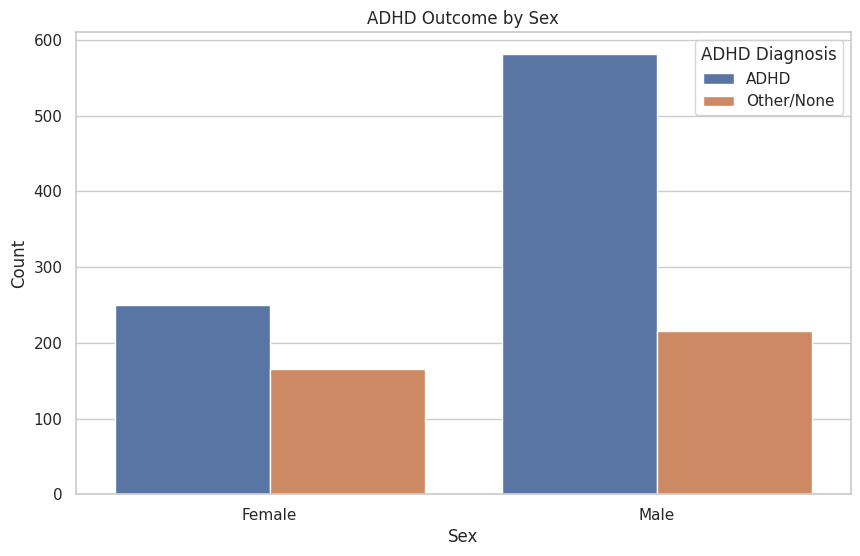

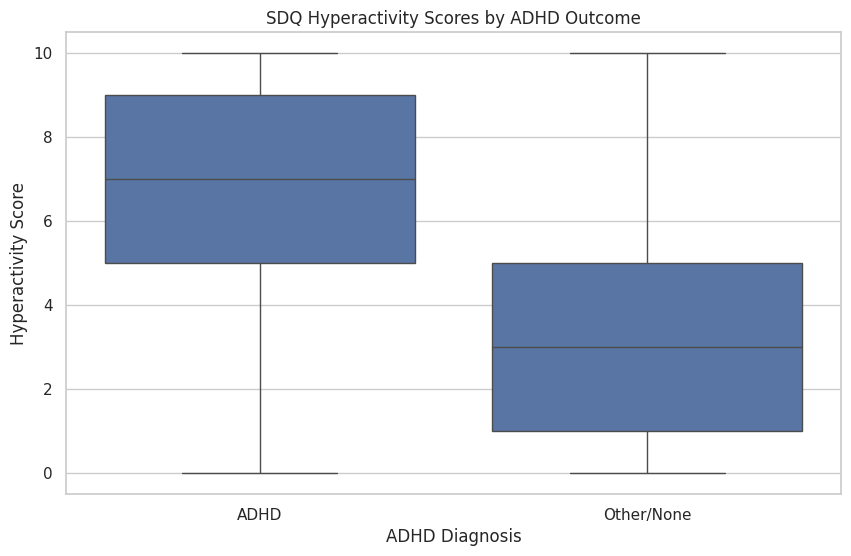

In [ ]:

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Plot 1: ADHD Outcome by Sex
adhd_sex_plot = df_labels.copy()
adhd_sex_plot['Sex_F'] = adhd_sex_plot['Sex_F'].map({0: 'Male', 1: 'Female'})
adhd_sex_plot['ADHD_Outcome'] = adhd_sex_plot['ADHD_Outcome'].map({0: 'Other/None', 1: 'ADHD'})

plt.figure()
sns.countplot(data=adhd_sex_plot, x='Sex_F', hue='ADHD_Outcome')
plt.title("ADHD Outcome by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="ADHD Diagnosis")
plt.show()

# Plot 2: SDQ Hyperactivity boxplot by ADHD Outcome
df_combined['ADHD_Outcome'] = df_combined['ADHD_Outcome'].map({0: 'Other/None', 1: 'ADHD'})

plt.figure()
sns.boxplot(data=df_combined, x='ADHD_Outcome', y='SDQ_SDQ_Hyperactivity')
plt.title("SDQ Hyperactivity Scores by ADHD Outcome")
plt.xlabel("ADHD Diagnosis")
plt.ylabel("Hyperactivity Score")
plt.show()

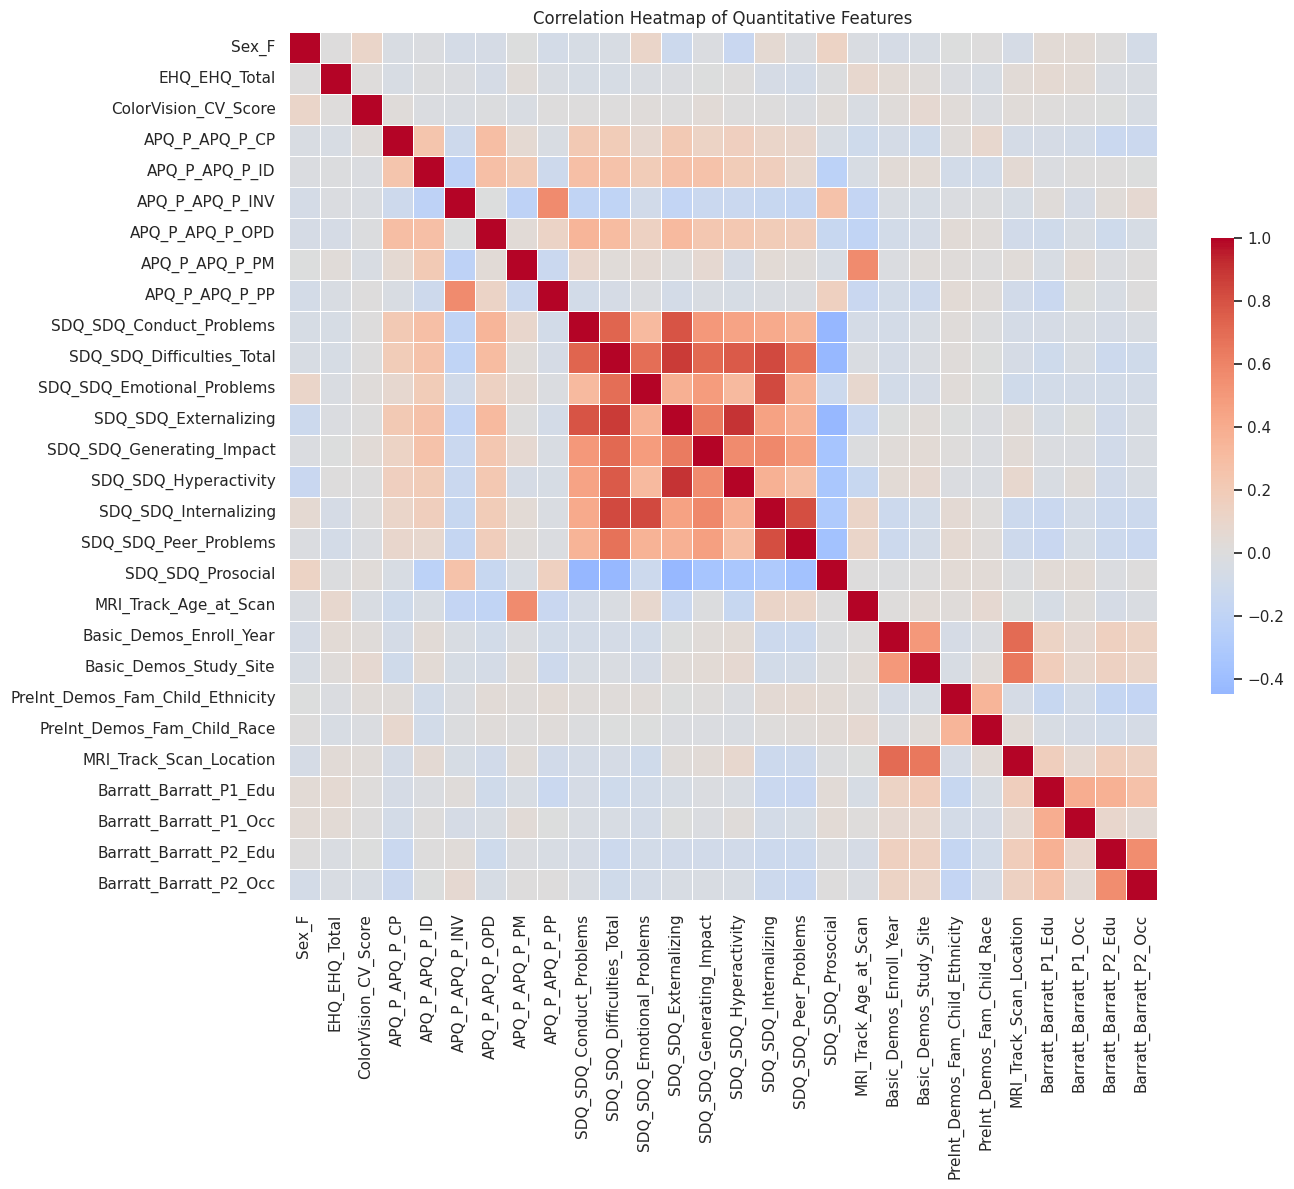

In [ ]:
import numpy as np

# Select only numeric columns for correlation
numeric_df = df_combined.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title("Correlation Heatmap of Quantitative Features")
plt.tight_layout()
plt.show()

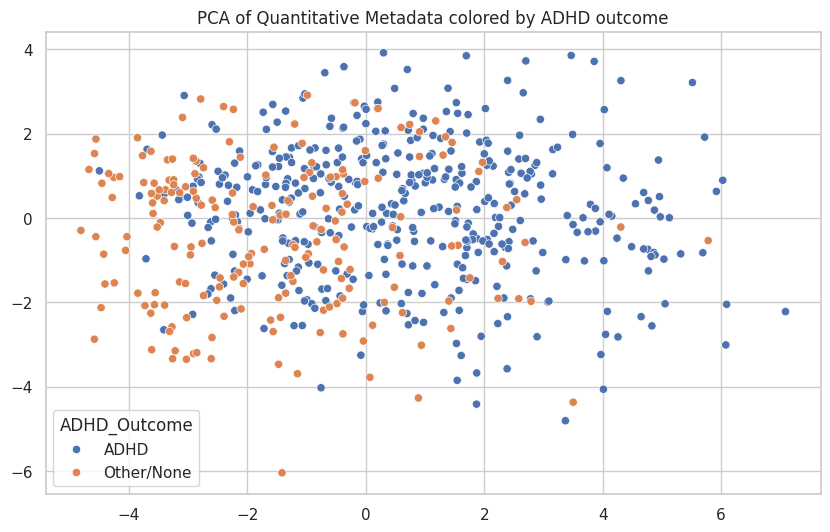

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = numeric_df.dropna()
y = df_combined.loc[X.index, 'ADHD_Outcome']

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_out = pca.fit_transform(X_scaled)

sns.scatterplot(x=pca_out[:, 0], y=pca_out[:, 1], hue=y)
plt.title("PCA of Quantitative Metadata colored by ADHD outcome")
plt.show()



<ipython-input-15-9f3670ef2827>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette='coolwarm')


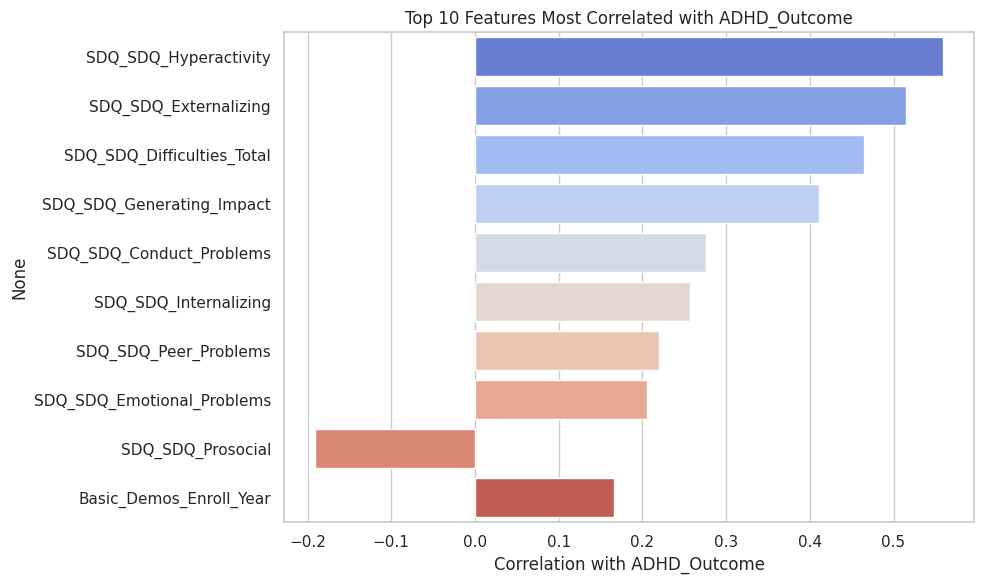

In [ ]:

numeric_df = df_combined.select_dtypes(include=[np.number])


if 'ADHD_Outcome' not in numeric_df.columns:
    numeric_df['ADHD_Outcome'] = df_combined['ADHD_Outcome'].map({'Other/None': 0, 'ADHD': 1})

adhd_corr = numeric_df.corr()['ADHD_Outcome'].drop('ADHD_Outcome')
top_10_corr = adhd_corr.reindex(adhd_corr.abs().sort_values(ascending=False).index).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette='coolwarm')
plt.title("Top 10 Features Most Correlated with ADHD_Outcome")
plt.xlabel("Correlation with ADHD_Outcome")
plt.tight_layout()
plt.show()

In [ ]:
df_combined.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F', 'EHQ_EHQ_Total',
       'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID',
       'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM',
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan',
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [ ]:
# --- Categorical Columns with Custom Fill ---
cat_missing_cols = [
    'Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P1_Edu',
    'PreInt_Demos_Fam_Child_Race', 'PreInt_Demos_Fam_Child_Ethnicity',
    'MRI_Track_Scan_Location'
]

# Fill some with mode or explicit 'Unknown', rest default to 'Missing'
custom_cat_fill = {
    'PreInt_Demos_Fam_Child_Race': 'Unknown',
    'PreInt_Demos_Fam_Child_Ethnicity': 'Unknown',
    'MRI_Track_Scan_Location': df_combined['MRI_Track_Scan_Location'].mode()[0]
}

for col in cat_missing_cols:
    fill_value = custom_cat_fill.get(col, 'Missing')
    df_combined[col] = df_combined[col].fillna(fill_value)

# --- Numerical Columns with Median Fill ---
numerical_missing_cols = [
    'MRI_Track_Age_at_Scan', 'ColorVision_CV_Score', 'EHQ_EHQ_Total'
] + [col for col in df_combined.columns if col.startswith('APQ_P_APQ_P_')] \
  + [col for col in df_combined.columns if col.startswith('SDQ_')]

df_combined[numerical_missing_cols] = df_combined[numerical_missing_cols].fillna(
    df_combined[numerical_missing_cols].median()
)

# --- Encode and Clean Target Columns ---
# Replace instead of map to avoid accidental NaNs
df_combined['ADHD_Outcome'] = df_combined['ADHD_Outcome'].replace({'Other/None': 0, 'ADHD': 1})

# Drop rows with invalid/missing targets
df_combined = df_combined[df_combined['ADHD_Outcome'].isin([0, 1])]
df_combined = df_combined[df_combined['Sex_F'].isin([0, 1])]

# --- Final Sanity Check ---
df_combined = df_combined.reset_index(drop=True)
assert df_combined['ADHD_Outcome'].notna().all()
assert df_combined['Sex_F'].notna().all()


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# --- 1. Load Data ---
df_conn = pd.read_csv("/content/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
id_col = [col for col in df_conn.columns if 'id' in col.lower()][0]
df_conn = df_conn.rename(columns={id_col: "participant_id"})
df_conn.set_index("participant_id", inplace=True)

conn_pca = PCA(n_components=50).fit_transform(df_conn)
conn_pca_df = pd.DataFrame(conn_pca, index=df_conn.index, columns=[f"pca_conn_{i}" for i in range(50)])

df_all = df_combined.set_index("participant_id").join(conn_pca_df, how="left").reset_index()

# --- 2. Feature Columns ---
cat_cols = df_combined.select_dtypes(include='object').columns.tolist()
num_cols = df_combined.select_dtypes(include='number').drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore').columns.tolist()
conn_cols = conn_pca_df.columns.tolist()

for col in cat_cols:
    df_all[col] = df_all[col].astype(str)  # CatBoost expects categorical columns as strings

# --- 3. Define Targets and Inputs ---
y_adhd = df_all['ADHD_Outcome']
y_sex = df_all['Sex_F']

X_adhd = df_all[num_cols + cat_cols + conn_cols]
X_sex = X_adhd.drop(columns=['ADHD_Outcome'], errors='ignore')

# Find cat feature indices for CatBoost
cat_feature_indices = [X_sex.columns.get_loc(col) for col in cat_cols]

# --- 4. Preprocessor for ADHD (LightGBM) ---
preprocessor_adhd = ColumnTransformer([
    ('num', StandardScaler(), num_cols + conn_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# --- 5. Models ---
# ADHD LightGBM Model
clf_adhd = Pipeline([
    ('pre', preprocessor_adhd),
    ('model', LGBMClassifier(
        learning_rate=0.01,
        max_depth=10,
        min_child_samples=20,
        n_estimators=300,
        num_leaves=15,
        random_state=42
    ))
])

# Sex CatBoost Model (No preprocessing needed for CatBoost!)
clf_sex = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.02,
    loss_function='Logloss',
    eval_metric='F1',
    early_stopping_rounds=50,
    cat_features=cat_feature_indices,
    auto_class_weights='Balanced',  # Optional tuning
    verbose=0,
    random_seed=42
)
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Rebuild CatBoost
model = CatBoostClassifier(
    cat_features=cat_feature_indices,
    auto_class_weights='Balanced',   # NEW: auto-balance
    loss_function='Logloss',
    eval_metric='F1',
    random_seed=42,
    verbose=0
)



# --- 6. Cross-Validation Functions ---
def cross_validate_lightgbm(X, y, pipeline, n_splits=5, name="Task"):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    acc_scores, f1_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        acc_scores.append(acc)
        f1_scores.append(f1)

        print(f"[{name}] Fold {fold+1}: Acc = {acc:.3f}, F1 = {f1:.3f}")

    print(f"\n📊 {name} CV Results ({n_splits} folds):")
    print(f"Accuracy: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")
    print(f"F1 Score: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")
    print("─" * 50)

def cross_validate_catboost(X, y, model, n_splits=5, name="Task"):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    acc_scores, f1_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=(X_val, y_val))
        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        acc_scores.append(acc)
        f1_scores.append(f1)

        print(f"[{name}] Fold {fold+1}: Acc = {acc:.3f}, F1 = {f1:.3f}")

    print(f"\n📊 {name} CV Results ({n_splits} folds):")
    print(f"Accuracy: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")
    print(f"F1 Score: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")
    print("─" * 50)

# --- 7. Run Final Evaluation ---
print("\n🔁 Final Stratified 5-Fold CV with Selected Parameters\n")
cross_validate_lightgbm(X_adhd, y_adhd, clf_adhd, name="ADHD_Outcome")
cross_validate_catboost(X_sex, y_sex, clf_sex, name="Sex_F")



🔁 Final Stratified 5-Fold CV with Selected Parameters

[LightGBM] [Info] Number of positive: 664, number of negative: 306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13451
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684536 -> initscore=0.774697
[LightGBM] [Info] Start training from score 0.774697


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 1: Acc = 0.761, F1 = 0.830
[LightGBM] [Info] Number of positive: 665, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13446
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685567 -> initscore=0.779475
[LightGBM] [Info] Start training from score 0.779475


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 2: Acc = 0.840, F1 = 0.889
[LightGBM] [Info] Number of positive: 665, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13452
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685567 -> initscore=0.779475
[LightGBM] [Info] Start training from score 0.779475


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 3: Acc = 0.786, F1 = 0.854
[LightGBM] [Info] Number of positive: 665, number of negative: 306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13456
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684861 -> initscore=0.776202
[LightGBM] [Info] Start training from score 0.776202


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 4: Acc = 0.781, F1 = 0.845
[LightGBM] [Info] Number of positive: 665, number of negative: 306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13455
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684861 -> initscore=0.776202
[LightGBM] [Info] Start training from score 0.776202


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 5: Acc = 0.826, F1 = 0.877

📊 ADHD_Outcome CV Results (5 folds):
Accuracy: 0.799 ± 0.029
F1 Score: 0.859 ± 0.021
──────────────────────────────────────────────────
[Sex_F] Fold 1: Acc = 0.630, F1 = 0.516
[Sex_F] Fold 2: Acc = 0.626, F1 = 0.524
[Sex_F] Fold 3: Acc = 0.588, F1 = 0.474
[Sex_F] Fold 4: Acc = 0.483, F1 = 0.514
[Sex_F] Fold 5: Acc = 0.653, F1 = 0.523

📊 Sex_F CV Results (5 folds):
Accuracy: 0.596 ± 0.060
F1 Score: 0.510 ± 0.019
──────────────────────────────────────────────────


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# --- 1. Load Data ---
df_conn = pd.read_csv("/content/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
id_col = [col for col in df_conn.columns if 'id' in col.lower()][0]
df_conn = df_conn.rename(columns={id_col: "participant_id"})
df_conn.set_index("participant_id", inplace=True)

conn_pca = PCA(n_components=50, random_state=42).fit_transform(df_conn)
conn_pca_df = pd.DataFrame(conn_pca, index=df_conn.index, columns=[f"pca_conn_{i}" for i in range(50)])

df_all = df_combined.set_index("participant_id").join(conn_pca_df, how="left").reset_index()

# --- 2. Feature Columns ---
cat_cols = df_combined.select_dtypes(include='object').columns.tolist()
num_cols = df_combined.select_dtypes(include='number').drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore').columns.tolist()
conn_cols = conn_pca_df.columns.tolist()

for col in cat_cols:
    df_all[col] = df_all[col].astype(str)

# --- 3. Define Inputs & Targets ---
y_adhd = df_all['ADHD_Outcome']
y_sex = df_all['Sex_F']

X_adhd = df_all[num_cols + cat_cols + conn_cols]
X_sex = X_adhd.drop(columns=['ADHD_Outcome'], errors='ignore')

cat_feature_indices = [X_sex.columns.get_loc(col) for col in cat_cols]

# --- 4. Preprocessor for ADHD Model (LightGBM) ---
preprocessor_adhd = ColumnTransformer([
    ('num', StandardScaler(), num_cols + conn_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# --- 5. Model Definitions ---
# ADHD LightGBM Model
clf_adhd = Pipeline([
    ('pre', preprocessor_adhd),
    ('model', LGBMClassifier(
        learning_rate=0.01,
        max_depth=10,
        min_child_samples=20,
        n_estimators=300,
        num_leaves=15,
        random_state=42
    ))
])

# Sex_F CatBoost Model (smartly tuned for F1)
clf_sex = CatBoostClassifier(
    iterations=2500,
    depth=8,
    learning_rate=0.03,
    l2_leaf_reg=4,
    subsample=0.7,
    colsample_bylevel=0.8,
    border_count=128,
    random_strength=2,
    cat_features=cat_feature_indices,
    auto_class_weights='Balanced',
    early_stopping_rounds=100,
    loss_function='Logloss',
    eval_metric='F1',
    random_seed=42,
    verbose=0
)

# --- 6. Cross-Validation Functions ---
def cross_validate_lightgbm(X, y, pipeline, n_splits=5, name="Task"):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    acc_scores, f1_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        acc_scores.append(acc)
        f1_scores.append(f1)

        print(f"[{name}] Fold {fold+1}: Acc = {acc:.3f}, F1 = {f1:.3f}")

    print(f"\n📊 {name} CV Results ({n_splits} folds):")
    print(f"Accuracy: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")
# --- 7. Run Final Evaluation ---
print("\n🔁 Final Stratified 5-Fold CV with Selected Parameters\n")
cross_validate_lightgbm(X_adhd, y_adhd, clf_adhd, name="ADHD_Outcome")
cross_validate_catboost(X_sex, y_sex, clf_sex, name="Sex_F")




🔁 Final Stratified 5-Fold CV with Selected Parameters

[LightGBM] [Info] Number of positive: 664, number of negative: 306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13489
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684536 -> initscore=0.774697
[LightGBM] [Info] Start training from score 0.774697


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 1: Acc = 0.774, F1 = 0.844
[LightGBM] [Info] Number of positive: 665, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13479
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685567 -> initscore=0.779475
[LightGBM] [Info] Start training from score 0.779475


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 2: Acc = 0.831, F1 = 0.884
[LightGBM] [Info] Number of positive: 665, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13485
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685567 -> initscore=0.779475
[LightGBM] [Info] Start training from score 0.779475


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 3: Acc = 0.802, F1 = 0.865
[LightGBM] [Info] Number of positive: 665, number of negative: 306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13487
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684861 -> initscore=0.776202
[LightGBM] [Info] Start training from score 0.776202


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 4: Acc = 0.789, F1 = 0.851
[LightGBM] [Info] Number of positive: 665, number of negative: 306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13483
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684861 -> initscore=0.776202
[LightGBM] [Info] Start training from score 0.776202


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[ADHD_Outcome] Fold 5: Acc = 0.818, F1 = 0.873

📊 ADHD_Outcome CV Results (5 folds):
Accuracy: 0.803 ± 0.020
[Sex_F] Fold 1: Acc = 0.704, F1 = 0.550
[Sex_F] Fold 2: Acc = 0.621, F1 = 0.477
[Sex_F] Fold 3: Acc = 0.584, F1 = 0.477
[Sex_F] Fold 4: Acc = 0.756, F1 = 0.624
[Sex_F] Fold 5: Acc = 0.409, F1 = 0.421

📊 Sex_F CV Results (5 folds):
Accuracy: 0.615 ± 0.119
F1 Score: 0.510 ± 0.070
──────────────────────────────────────────────────


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
# --- Sex_F CatBoost Expanded and Tuned Pipeline (Version 3.0) ---

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# --- 1. Data Preparation ---

# Load functional connectomes
df_conn = pd.read_csv("/content/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
id_col = [col for col in df_conn.columns if 'id' in col.lower()][0]
df_conn = df_conn.rename(columns={id_col: "participant_id"})
df_conn.set_index("participant_id", inplace=True)

# PCA on connectomes (expand to 100!)
conn_pca = PCA(n_components=100, random_state=42).fit_transform(df_conn)
conn_pca_df = pd.DataFrame(conn_pca, index=df_conn.index, columns=[f"pca_conn_{i}" for i in range(100)])

# Merge with metadata
df_all = df_combined.set_index("participant_id").join(conn_pca_df, how="left").reset_index()

# Fix categorical
cat_cols = df_combined.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df_all[col] = df_all[col].astype(str)

# --- 2. Feature Engineering ---

meta_cols = [
    'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

behavior_cols = [
    'EHQ_EHQ_Total', 'ColorVision_CV_Score',
    'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Hyperactivity'
]

# Add Behavior_Score
df_all['Behavior_Score'] = (df_all['SDQ_SDQ_Externalizing'] + df_all['SDQ_SDQ_Internalizing']) / 2

# Final feature list
X_sex = df_all[meta_cols + behavior_cols + ['Behavior_Score'] + list(conn_pca_df.columns)].copy()
y_sex = df_all['Sex_F']

# Mark categorical features
cat_feature_indices = [X_sex.columns.get_loc(col) for col in meta_cols]

for col in meta_cols:
    X_sex[col] = X_sex[col].astype(str)

# --- 3. Model Definition ---

clf_sex = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.02,
    depth=7,
    l2_leaf_reg=7,
    subsample=0.75,
    rsm=0.75,
    one_hot_max_size=5,   # allow one-hot for small categories (like Race)
    cat_features=cat_feature_indices,
    loss_function='Logloss',
    eval_metric='F1',
    early_stopping_rounds=75,
    auto_class_weights='Balanced',
    boosting_type='Plain',
    task_type='CPU',
    random_seed=42,
    verbose=0
)

# --- 4. Cross-Validation ---

def cross_validate_catboost(X, y, model, n_splits=5, name="Task"):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    acc_scores, f1_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=(X_val, y_val))
        y_pred = model.predict(X_val)

        acc = (y_val == y_pred).mean()
        f1 = f1_score(y_val, y_pred)

        acc_scores.append(acc)
        f1_scores.append(f1)

        print(f"[{name}] Fold {fold+1}: Acc = {acc:.3f}, F1 = {f1:.3f}")

    print(f"\n📊 {name} CV Results ({n_splits} folds):")
    print(f"Accuracy: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")
    print(f"F1 Score: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")
    print("─" * 50)

# --- 5. Run the Model ---

print("\n🔁 Final Stratified 5-Fold CV: Improved CatBoost on Sex_F")
cross_validate_catboost(X_sex, y_sex, clf_sex, name="CatBoost_Sex_F_Improved")



🔁 Final Stratified 5-Fold CV: Improved CatBoost on Sex_F
[CatBoost_Sex_F_Improved] Fold 1: Acc = 0.679, F1 = 0.557
[CatBoost_Sex_F_Improved] Fold 2: Acc = 0.564, F1 = 0.495
[CatBoost_Sex_F_Improved] Fold 3: Acc = 0.539, F1 = 0.521
[CatBoost_Sex_F_Improved] Fold 4: Acc = 0.413, F1 = 0.486
[CatBoost_Sex_F_Improved] Fold 5: Acc = 0.595, F1 = 0.467

📊 CatBoost_Sex_F_Improved CV Results (5 folds):
Accuracy: 0.558 ± 0.086
F1 Score: 0.505 ± 0.031
──────────────────────────────────────────────────


In [ ]:
# --- Sex_F CatBoost Expanded and Tuned Pipeline (Version 3.1 with Priority Improvements) ---

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

# --- 1. Data Preparation ---

# Load functional connectomes
df_conn = pd.read_csv("/content/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
id_col = [col for col in df_conn.columns if 'id' in col.lower()][0]
df_conn = df_conn.rename(columns={id_col: "participant_id"})
df_conn.set_index("participant_id", inplace=True)

# PCA on connectomes (100 components)
conn_pca = PCA(n_components=100, random_state=42).fit_transform(df_conn)
conn_pca_df = pd.DataFrame(conn_pca, index=df_conn.index, columns=[f"pca_conn_{i}" for i in range(100)])

# Merge with metadata
df_all = df_combined.set_index("participant_id").join(conn_pca_df, how="left").reset_index()

# Fix categorical columns
cat_cols = df_combined.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df_all[col] = df_all[col].astype(str)

# --- 2. Feature Engineering ---

meta_cols = [
    'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

behavior_cols = [
    'EHQ_EHQ_Total', 'ColorVision_CV_Score',
    'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Hyperactivity'
]

# Add Behavior_Score
df_all['Behavior_Score'] = (df_all['SDQ_SDQ_Externalizing'] + df_all['SDQ_SDQ_Internalizing']) / 2

# ── PRIORITY IMPROVEMENT: Feature Interactions ──
df_all["Parental_Edu_Sum"] = df_all["Barratt_Barratt_P1_Edu"].astype(str) + "_" + df_all["Barratt_Barratt_P2_Edu"].astype(str)
df_all["Race_Ethnicity"] = df_all["PreInt_Demos_Fam_Child_Race"].astype(str) + "_" + df_all["PreInt_Demos_Fam_Child_Ethnicity"].astype(str)

meta_cols += ["Parental_Edu_Sum", "Race_Ethnicity"]

# Final feature list
X_sex = df_all[meta_cols + behavior_cols + ['Behavior_Score'] + list(conn_pca_df.columns)].copy()
y_sex = df_all['Sex_F']

# Mark categorical features
cat_feature_indices = [X_sex.columns.get_loc(col) for col in meta_cols]
for col in meta_cols:
    X_sex[col] = X_sex[col].astype(str)

# ── PRIORITY IMPROVEMENT: Manual Class Weights ──
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_sex), y=y_sex)
class_weights = {0: weights[0], 1: weights[1]}

# --- 3. Model Definition ---

clf_sex = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.02,
    depth=7,
    l2_leaf_reg=7,
    subsample=0.75,
    rsm=0.75,
    one_hot_max_size=5,
    cat_features=cat_feature_indices,
    loss_function='Logloss',
    eval_metric='F1',
    early_stopping_rounds=75,
    class_weights=class_weights,
    boosting_type='Ordered',  # PRIORITY IMPROVEMENT: Ordered boosting
    task_type='CPU',
    random_seed=42,
    verbose=0
)

# --- 4. Cross-Validation ---

from sklearn.metrics import f1_score, precision_recall_curve

def cross_validate_catboost(X, y, model, n_splits=5, name="Task"):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    acc_scores, f1_scores, f1_opt_scores = [], [], []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=(X_val, y_val))

        # Predict probabilities
        prob_val = model.predict_proba(X_val)[:, 1]

        # F1 with threshold = 0.5
        y_pred_std = (prob_val >= 0.5).astype(int)
        f1_std = f1_score(y_val, y_pred_std)
        acc = (y_val == y_pred_std).mean()

        # F1 with optimal threshold
        prec, rec, thresh = precision_recall_curve(y_val, prob_val)
        f1_scores_list = 2 * (prec * rec) / (prec + rec + 1e-8)
        best_thresh_idx = np.argmax(f1_scores_list)
        best_thresh = thresh[best_thresh_idx]
        f1_opt = f1_scores_list[best_thresh_idx]

        acc_scores.append(acc)
        f1_scores.append(f1_std)
        f1_opt_scores.append(f1_opt)

        print(f"[{name}] Fold {fold+1}: Acc = {acc:.3f}, F1@0.5 = {f1_std:.3f}, BestF1 = {f1_opt:.3f} @ Thresh={best_thresh:.2f}")

    print(f"\n📊 {name} CV Results ({n_splits} folds):")
    print(f"Accuracy:      {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")
    print(f"F1 @ 0.5:      {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")
    print(f"Best F1 tuned: {np.mean(f1_opt_scores):.3f} ± {np.std(f1_opt_scores):.3f}")
    print("─" * 50)


# --- 5. Run the Model ---

print("\n🔁 Final Stratified 5-Fold CV: CatBoost Sex_F v3.1 with Priority Improvements")
cross_validate_catboost(X_sex, y_sex, clf_sex, name="CatBoost_Sex_F_v3.1")



🔁 Final Stratified 5-Fold CV: CatBoost Sex_F v3.1 with Priority Improvements
[CatBoost_Sex_F_v3.1] Fold 1: Acc = 0.593, F1@0.5 = 0.497, BestF1 = 0.558 @ Thresh=0.49
[CatBoost_Sex_F_v3.1] Fold 2: Acc = 0.646, F1@0.5 = 0.517, BestF1 = 0.559 @ Thresh=0.48
[CatBoost_Sex_F_v3.1] Fold 3: Acc = 0.531, F1@0.5 = 0.496, BestF1 = 0.514 @ Thresh=0.50
[CatBoost_Sex_F_v3.1] Fold 4: Acc = 0.612, F1@0.5 = 0.569, BestF1 = 0.578 @ Thresh=0.50
[CatBoost_Sex_F_v3.1] Fold 5: Acc = 0.570, F1@0.5 = 0.485, BestF1 = 0.517 @ Thresh=0.48

📊 CatBoost_Sex_F_v3.1 CV Results (5 folds):
Accuracy:      0.590 ± 0.039
F1 @ 0.5:      0.513 ± 0.030
Best F1 tuned: 0.545 ± 0.025
──────────────────────────────────────────────────


In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.1 MB/s eta 0:00:00



🔁 Fitting final CatBoost model on all data for SHAP analysis...
🔍 Computing SHAP values (this may take a moment)...
📊 SHAP Summary Bar Plot:


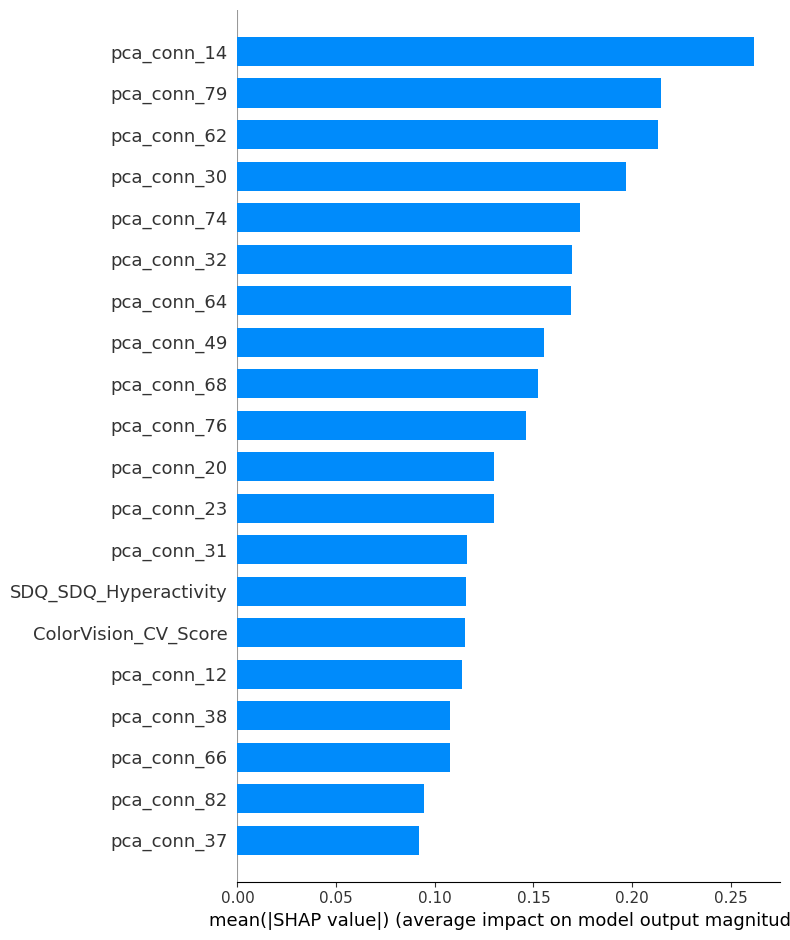

📈 SHAP Summary Dot (Beeswarm) Plot:


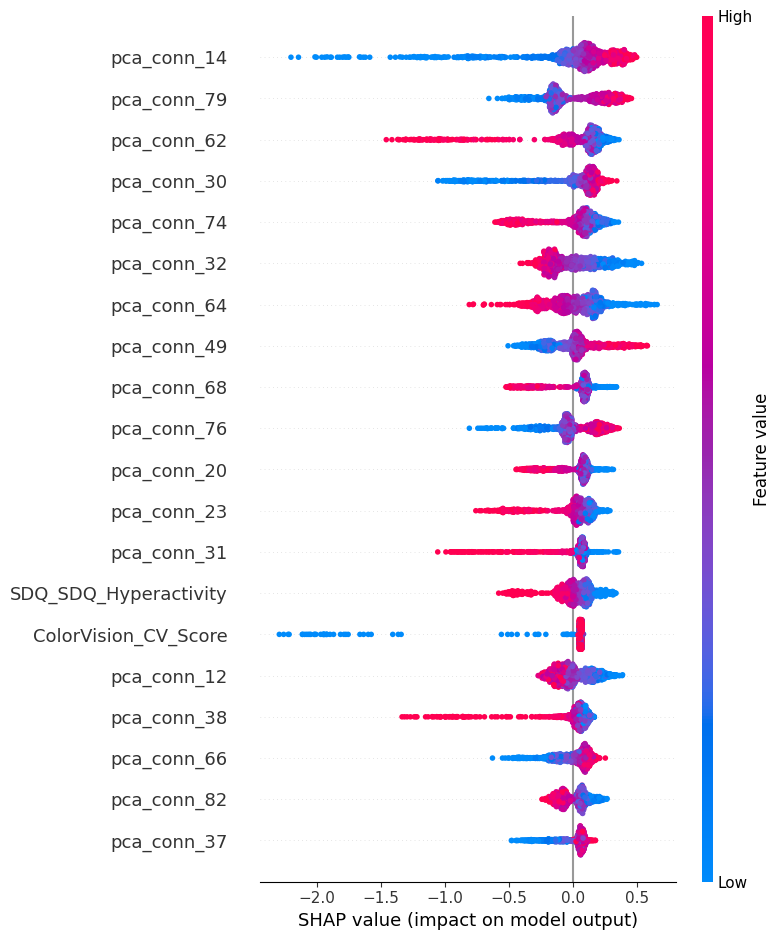

In [ ]:
# --- 6. Refit on Full Data and Generate SHAP Summary ---

print("\n🔁 Fitting final CatBoost model on all data for SHAP analysis...")
clf_sex.fit(X_sex, y_sex)

import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.TreeExplainer(clf_sex)

# Compute SHAP values
print("🔍 Computing SHAP values (this may take a moment)...")
shap_values = explainer.shap_values(X_sex)

# Bar plot of mean SHAP value per feature
print("📊 SHAP Summary Bar Plot:")
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_sex, plot_type="bar", show=True)

# Optional detailed beeswarm plot
print("📈 SHAP Summary Dot (Beeswarm) Plot:")
shap.summary_plot(shap_values, X_sex, plot_type="dot", show=True)


In [ ]:
top_pca = [f for f in X_sex.columns if f.startswith("pca_conn_")][:40]
X_sex_reduced = X_sex[meta_cols + behavior_cols + ['Behavior_Score'] + top_pca]


In [ ]:
cross_validate_catboost(X_sex_reduced, y_sex, clf_sex, name="CatBoost_Sex_F_TopSHAP")

[CatBoost_Sex_F_TopSHAP] Fold 1: Acc = 0.543, F1@0.5 = 0.502, BestF1 = 0.547 @ Thresh=0.50
[CatBoost_Sex_F_TopSHAP] Fold 2: Acc = 0.564, F1@0.5 = 0.485, BestF1 = 0.523 @ Thresh=0.49
[CatBoost_Sex_F_TopSHAP] Fold 3: Acc = 0.646, F1@0.5 = 0.547, BestF1 = 0.556 @ Thresh=0.50
[CatBoost_Sex_F_TopSHAP] Fold 4: Acc = 0.616, F1@0.5 = 0.551, BestF1 = 0.570 @ Thresh=0.48
[CatBoost_Sex_F_TopSHAP] Fold 5: Acc = 0.587, F1@0.5 = 0.451, BestF1 = 0.523 @ Thresh=0.43

📊 CatBoost_Sex_F_TopSHAP CV Results (5 folds):
Accuracy:      0.591 ± 0.037
F1 @ 0.5:      0.507 ± 0.038
Best F1 tuned: 0.544 ± 0.018
──────────────────────────────────────────────────


In [ ]:
# --- 1. Frequency Encoding for Meta Columns ---
meta_freq_cols = []
for col in meta_cols:
    freq_map = df_all[col].value_counts(normalize=True)
    new_col = f"{col}_freq"
    df_all[new_col] = df_all[col].map(freq_map)
    meta_freq_cols.append(new_col)

# --- 2. Use Top SHAP PCA Components ---
top_pca_features = [
    'pca_conn_14', 'pca_conn_79', 'pca_conn_62', 'pca_conn_30', 'pca_conn_74',
    'pca_conn_32', 'pca_conn_64', 'pca_conn_49', 'pca_conn_68', 'pca_conn_76',
    'pca_conn_20', 'pca_conn_23', 'pca_conn_31', 'pca_conn_12', 'pca_conn_38',
    'pca_conn_66', 'pca_conn_82', 'pca_conn_37'
]

# --- 3. Final Feature Set ---
X_sex_final = df_all[
    meta_freq_cols + behavior_cols + ['Behavior_Score'] + top_pca_features
].copy()
y_sex = df_all['Sex_F']

# --- 4. CatBoost Classifier (same hyperparameters) ---
clf_sex = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.02,
    depth=7,
    l2_leaf_reg=7,
    subsample=0.75,
    rsm=0.75,
    one_hot_max_size=5,
    loss_function='Logloss',
    eval_metric='F1',
    early_stopping_rounds=75,
    class_weights=class_weights,
    boosting_type='Ordered',
    task_type='CPU',
    random_seed=42,
    verbose=0
)

# --- 5. Cross-Validation ---
print("\n🔁 Final Stratified 5-Fold CV: CatBoost Sex_F v3.2 with SHAP PCA + Frequency Encoding")
cross_validate_catboost(X_sex_final, y_sex, clf_sex, name="CatBoost_Sex_F_v3.2")



🔁 Final Stratified 5-Fold CV: CatBoost Sex_F v3.2 with SHAP PCA + Frequency Encoding
[CatBoost_Sex_F_v3.2] Fold 1: Acc = 0.576, F1@0.5 = 0.546, BestF1 = 0.551 @ Thresh=0.50
[CatBoost_Sex_F_v3.2] Fold 2: Acc = 0.486, F1@0.5 = 0.494, BestF1 = 0.529 @ Thresh=0.49
[CatBoost_Sex_F_v3.2] Fold 3: Acc = 0.658, F1@0.5 = 0.546, BestF1 = 0.570 @ Thresh=0.46
[CatBoost_Sex_F_v3.2] Fold 4: Acc = 0.665, F1@0.5 = 0.580, BestF1 = 0.582 @ Thresh=0.50
[CatBoost_Sex_F_v3.2] Fold 5: Acc = 0.665, F1@0.5 = 0.571, BestF1 = 0.590 @ Thresh=0.50

📊 CatBoost_Sex_F_v3.2 CV Results (5 folds):
Accuracy:      0.610 ± 0.071
F1 @ 0.5:      0.548 ± 0.030
Best F1 tuned: 0.564 ± 0.022
──────────────────────────────────────────────────


In [ ]:
# --- ADHD and Sex_F Submission Pipeline ---

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# --- 1. Load Training Data ---
df_conn = pd.read_csv("/content/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
id_col = [col for col in df_conn.columns if 'id' in col.lower()][0]
df_conn = df_conn.rename(columns={id_col: "participant_id"}).set_index("participant_id")

conn_pca = PCA(n_components=50, random_state=42).fit_transform(df_conn)
conn_pca_df = pd.DataFrame(conn_pca, index=df_conn.index, columns=[f"pca_conn_{i}" for i in range(50)])

df_all = df_combined.set_index("participant_id").join(conn_pca_df, how="left").reset_index()

# --- 2. Feature Columns ---
cat_cols = df_combined.select_dtypes(include='object').columns.tolist()
num_cols = df_combined.select_dtypes(include='number').drop(columns=['ADHD_Outcome', 'Sex_F'], errors='ignore').columns.tolist()
conn_cols = conn_pca_df.columns.tolist()

for col in cat_cols:
    df_all[col] = df_all[col].astype(str)

# --- 3. ADHD LightGBM Model ---
preprocessor_adhd = ColumnTransformer([
    ('num', StandardScaler(), num_cols + conn_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

clf_adhd = Pipeline([
    ('pre', preprocessor_adhd),
    ('model', LGBMClassifier(
        learning_rate=0.01,
        max_depth=10,
        min_child_samples=20,
        n_estimators=300,
        num_leaves=15,
        random_state=42
    ))
])

# --- 4. Sex_F CatBoost Model with SHAP PCA and Frequency Encoding ---
meta_cols = [
    'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

meta_freq_cols = []
for col in meta_cols:
    freq_map = df_all[col].value_counts(normalize=True)
    df_all[f"{col}_freq"] = df_all[col].map(freq_map)
    meta_freq_cols.append(f"{col}_freq")

behavior_cols = [
    'EHQ_EHQ_Total', 'ColorVision_CV_Score',
    'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Internalizing'
]
df_all['Behavior_Score'] = (df_all['SDQ_SDQ_Externalizing'] + df_all['SDQ_SDQ_Internalizing']) / 2

top_pca_features = [
    'pca_conn_14', 'pca_conn_79', 'pca_conn_62', 'pca_conn_30', 'pca_conn_74',
    'pca_conn_32', 'pca_conn_64', 'pca_conn_49', 'pca_conn_68', 'pca_conn_76',
    'pca_conn_20', 'pca_conn_23', 'pca_conn_31', 'pca_conn_12', 'pca_conn_38',
    'pca_conn_66', 'pca_conn_82', 'pca_conn_37'
]

X_sex_final = df_all[meta_freq_cols + behavior_cols[:4] + ['Behavior_Score'] + top_pca_features]
y_sex = df_all['Sex_F']

from sklearn.utils.class_weight import compute_class_weight
class_weights = dict(zip([0, 1], compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_sex)))

clf_sex = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.02,
    depth=7,
    l2_leaf_reg=7,
    subsample=0.75,
    rsm=0.75,
    one_hot_max_size=5,
    loss_function='Logloss',
    eval_metric='F1',
    early_stopping_rounds=75,
    class_weights=class_weights,
    boosting_type='Ordered',
    task_type='CPU',
    random_seed=42,
    verbose=0
)

clf_adhd.fit(df_all[num_cols + cat_cols + conn_cols], df_all['ADHD_Outcome'])
clf_sex.fit(X_sex_final, y_sex)

# --- 5. Test Data Prep and Prediction ---
df_test_meta = pd.read_csv("/content/test_tsv/test_metadata.tsv", sep="\t")
df_test_conn = pd.read_csv("/content/test_tsv/test_functional_connectome_matrices_36P.csv")
df_test_conn = df_test_conn.rename(columns={df_test_conn.columns[0]: "participant_id"}).set_index("participant_id")

conn_pca = PCA(n_components=50, random_state=42).fit(df_conn).transform(df_test_conn)
conn_pca_df = pd.DataFrame(conn_pca, index=df_test_conn.index, columns=[f"pca_conn_{i}" for i in range(50)])

df_test = df_test_meta.set_index("participant_id").join(conn_pca_df, how="left").reset_index()

for col in cat_cols:
    df_test[col] = df_test[col].astype(str)

for col in meta_cols:
    freq_map = df_all[col].value_counts(normalize=True)
    df_test[f"{col}_freq"] = df_test[col].map(freq_map)

df_test['Behavior_Score'] = (df_test['SDQ_SDQ_Externalizing'] + df_test['SDQ_SDQ_Internalizing']) / 2

X_adhd_test = df_test[num_cols + cat_cols + conn_cols]
X_sex_test = df_test[meta_freq_cols + behavior_cols[:4] + ['Behavior_Score'] + top_pca_features]

adhd_preds = clf_adhd.predict(X_adhd_test)
sex_preds = clf_sex.predict(X_sex_test)

submission_df = pd.DataFrame({
    "participant_id": df_test["participant_id"],
    "ADHD_Outcome": adhd_preds.astype(int),
    "Sex_F": sex_preds.astype(int)
})

submission_df.to_csv("submission.csv", index=False)
